In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.text import TSNEVisualizer

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Removendo os stop words das colunas descripion e title
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
stop = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/WebScraping-covid+mexico.csv'

not_mex = pd.read_csv(url)
not_mex.drop('Unnamed: 0',axis=1,inplace=True)
not_mex['Data'] = pd.to_datetime(not_mex['Data'], format='%d-%m-%Y')
not_mex.head()

,Titulo,Data,URL da noticia
0,En 2019 hubo récord de donantes y trasplantes ...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...
1,Diez años de grieta son una década perdida par...,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...
2,General Las Heras: gigantesco incendio destruy...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...
4,Las apps que eligen los influencers de viajes ...,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...


In [ ]:
not_mex['Ano'] = not_mex['Data'].dt.year 
not_mex.head()

,Titulo,Data,URL da noticia,Ano
0,En 2019 hubo récord de donantes y trasplantes ...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020
1,Diez años de grieta son una década perdida par...,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020
2,General Las Heras: gigantesco incendio destruy...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020
4,Las apps que eligen los influencers de viajes ...,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020


In [ ]:
# Removendo os stop words das colunas descripion e title
stop = stopwords.words(['spanish','english'])

not_mex['Titulo'] = not_mex['Titulo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
not_mex.head()

,Titulo,Data,URL da noticia,Ano
0,En 2019 récord donantes trasplantes órganos Ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020
1,Diez años grieta década perdida Argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020
2,General Las Heras: gigantesco incendio destruy...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020
3,"Sale $ 50, ""todo 2 pesos"" renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020
4,Las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020


In [ ]:
# Aplicando lemantização
def lema(coluna):
  lema = []
  wnl = WordNetLemmatizer()
  lista = list(coluna)
  for i in range(len(lista)):
    lista_le = nltk.word_tokenize(lista[i])
    junta = ' '.join([wnl.lemmatize(words) for words in lista_le])
    lema.append(junta)
  coluna = lema
  return coluna

In [ ]:
not_mex['Titulo'] = lema(not_mex['Titulo'])
not_mex.head()

,Titulo,Data,URL da noticia,Ano
0,En 2019 récord donantes trasplantes órganos Ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020
1,Diez años grieta década perdida Argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020
2,General Las Heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020
3,"Sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020
4,Las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020


In [ ]:
not_mex['Titulo'] = not_mex['Titulo'].str.lower()
not_mex.head()

,Titulo,Data,URL da noticia,Ano
0,en 2019 récord donantes trasplantes órganos ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020
1,diez años grieta década perdida argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020
2,general las heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020
4,las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020


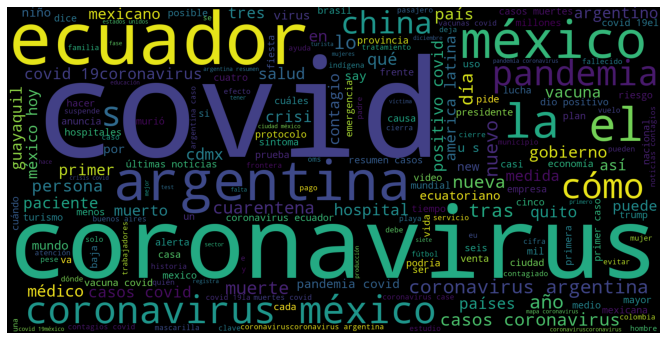

In [ ]:
juntar_texto = ''.join(s for s in not_mex[not_mex['Ano']==2020]['Titulo'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

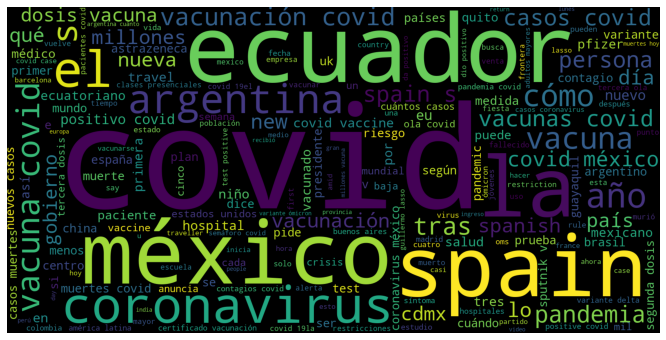

In [ ]:
juntar_texto2 = ''.join(s for s in not_mex[not_mex['Ano']==2021]['Titulo'])
wordcloud2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud2);

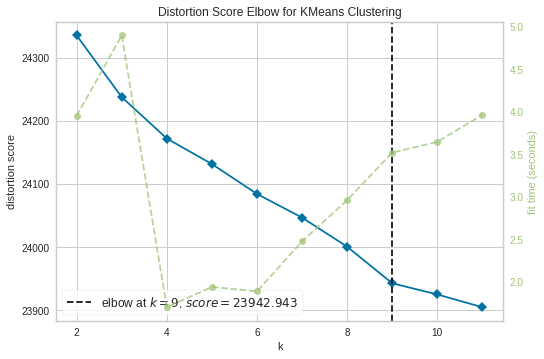

In [ ]:
count_vec = TfidfVectorizer()
tit_not_ma = count_vec.fit_transform(not_mex['Titulo'])

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(tit_not_ma)
visualizer.show()

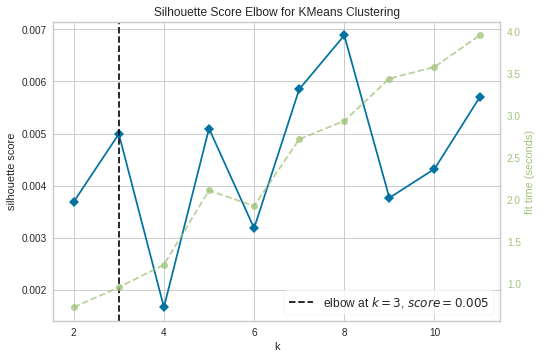

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,12),metric='silhouette')
visualizer.fit(tit_not_ma)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tit_not_ma)
not_mex['Cluster'] = kmeans.labels_
not_mex.head()

,Titulo,Data,URL da noticia,Ano,Cluster
0,en 2019 récord donantes trasplantes órganos ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020,0
1,diez años grieta década perdida argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020,0
2,general las heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020,0
4,las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020,0


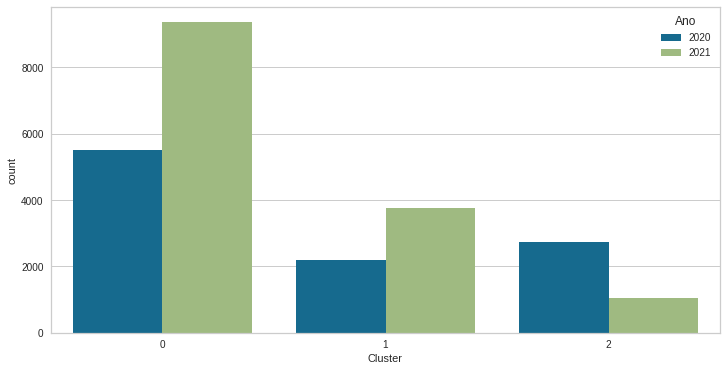

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster',data=not_mex,hue='Ano')

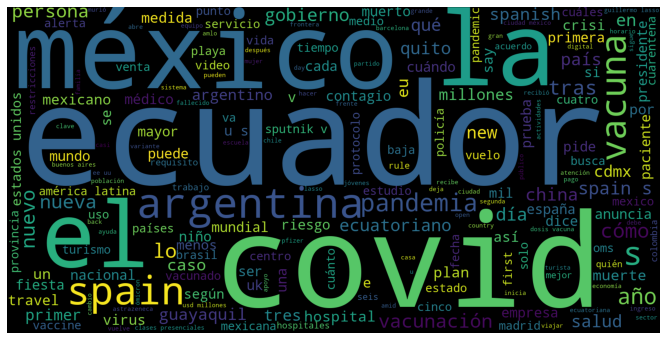

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_mex[not_mex['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

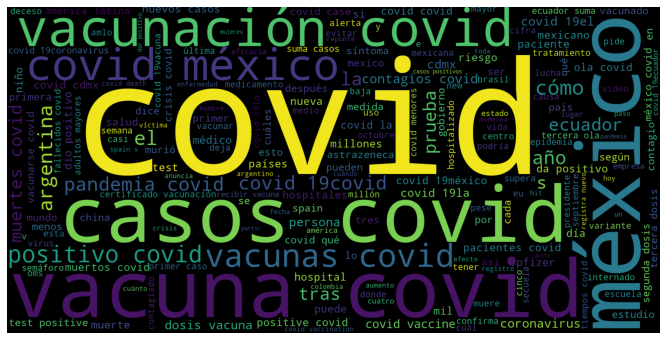

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_mex[not_mex['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

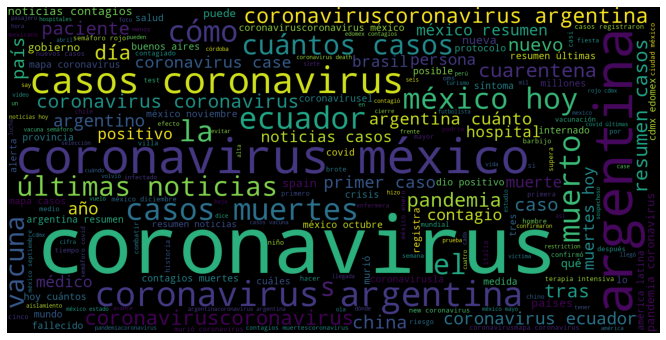

In [ ]:
juntar_texto_cluster_2 = ''.join(s for s in not_mex[not_mex['Cluster']==2]['Titulo'])
wordcloud_cluster_2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_2);

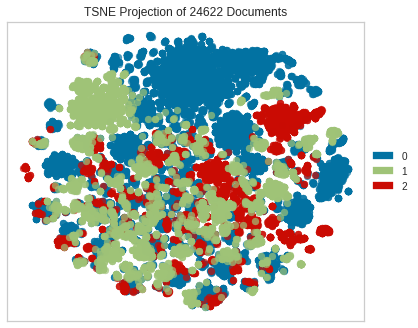

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(tit_not_ma, not_mex.Cluster)
tsne.show()

In [ ]:
not_mex.to_csv('Titulos Nocias México Cluster.csv')